# Describe
The project my group working on is one of two project from IDEAL. The data from the data owner is about the home energy feedback they collected by providing app on tablet and Web app. He sent me two CSV files about the user information and app usage.

I load the data of user information first. 

In [44]:
import pandas as pd
data = pd.read_csv("persondetails.csv")
print(data.head())

   Unnamed: 0  personid participation_start            WEEK_VIEW  \
0           0     765.0          2017-06-21  2017-07-14 11:27:07   
1           1     990.0          2017-09-28  2017-10-15 23:30:00   
2           2     673.0          2017-01-30  2017-03-15 15:30:25   
3           3     906.0          2017-08-31  2017-10-15 23:30:00   
4           4     729.0          2017-04-18  2017-05-15 08:49:01   

           MINUTE_VIEW        ENHANCED_VIEW        COMPARE_CHART  \
0  2017-07-14 11:27:07  2017-07-14 11:27:07  2017-07-14 11:27:07   
1  2017-10-15 23:30:00  2017-10-15 23:30:00  2017-10-15 23:30:00   
2  2017-03-15 15:30:25  2017-04-07 14:44:05  2017-05-29 11:18:16   
3  2017-10-15 23:30:00  2017-10-15 23:30:00  2017-10-15 23:30:00   
4                  NaN                  NaN                  NaN   

            DUAL_CHART HEATING_INTERVENTION  primaryparticipant    age  \
0  2017-07-14 11:27:07                  NaN                 0.0  55-59   
1  2017-10-15 23:30:00            

The data head demonstrates that the data frame has the information of participants’ ID, when they started to use the App, when the six features (WEEK VIEW, MINUTE VIEW, ENHANCED VIEW, COMPARE CHART, DUAL CHART, HEATING INTERVENTION) released to them, if they are primary participants, their gender, their age and if they have email address.

In the slides the data holder presented in the lecture, it showed that the users should be over 15 years old. However, in the data he provided, there are two age groups below 15. I am cleaning data first to remove these two age group.

In [45]:
data=data[data.age != '5-9']
data=data[data.age != '10-14']

Then I am find out many rows and columns and the size of data. 

In [46]:
print(data.shape)
print(data.size)

(226, 13)
2938


There are 226 rows and 13 columns in the data frame. It is not too large but the information in it could be complex. The type of data include float, object and bool. The relationship between each column need to be explored later.

Here I am giving some statistics about the data.

How many people used the app?

In [47]:
print(data.count().personid,"participates used the App.")

226 participates used the App.


How many participants started to use the app in 2016? How many started in 2017? (There are some date and time in the data which are objects and are difficult to deal with. So I am convert them to datetime object to make them easier to deal with.)

In [48]:
import datetime
data['participation_start'] = pd.to_datetime(data['participation_start'])
print(data[pd.DatetimeIndex(data['participation_start']).year==2016].count().personid, "participants started in 2016.")
print(data[pd.DatetimeIndex(data['participation_start']).year==2017].count().personid,"participants started in 2017.")

24 participants started in 2016.
202 participants started in 2017.


The result shows that there are more participants starting in 2017 than 2016.

From the data owner, I knew that not every participants received every function. I am calculating how many of participants used each feature.

In [49]:
print(data.count().WEEK_VIEW,"participants received the WEEK VIEW.")
print(data.count().MINUTE_VIEW,"participants received the MINUTE VIEW.")
print(data.count().ENHANCED_VIEW,"participants received the ENHANCED VIEW.")
print(data.count().COMPARE_CHART,"participants received the COMPARE CHART.")
print(data.count().DUAL_CHART,"participants received the DUAL CHART.")
print(data.count().HEATING_INTERVENTION,"participants received the HEATING INTERVENTION.")

226 participants received the WEEK VIEW.
126 participants received the MINUTE VIEW.
126 participants received the ENHANCED VIEW.
126 participants received the COMPARE CHART.
126 participants received the DUAL CHART.
10 participants received the HEATING INTERVENTION.


The result shows that WEEK VIEW was released to most participants; the number of participants who received MINUTED VIEW,ENHANCED VIEW,COMPARE CHART and DUAL CHART are same; HEATING INTERVENTION was released to least participants.

How many paticipants are primary participants? How many are not?

In [50]:
print(data[data['primaryparticipant']==1.0].count().primaryparticipant, "participants are primary participants.")
print(data[data['primaryparticipant']==0.0].count().primaryparticipant, "participants are not primary participants.")

120 participants are primary participants.
106 participants are not primary participants.


The result shows that there are more primary particpants than non-primary participants.


How many paticipants are male? How many are female?

In [51]:
print(data[data['gender']=='Male'].count().primaryparticipant, "participants are male.")
print(data[data['gender']=='Female'].count().primaryparticipant, "participants are female.")

105 participants are male.
117 participants are female.


The result shows that there are more female than male in participants.

How many participants are there in each age group?

In [52]:
print(data['age'].value_counts())

30-34    33
50-54    31
35-39    30
45-49    26
25-29    24
40-44    23
55-59    14
20-24    11
60-64    10
15-19    10
65-69     7
70-74     4
75-79     2
80+       1
Name: age, dtype: int64


The result shows that the largest age group of participants is 30-34 and the smallest age group of particpants is 80+.

How many people have email address?

In [53]:
data['have_email_address'].value_counts()
print(data[data['have_email_address'] ==True].count().primaryparticipant, "participants have email address.")
print(data[data['have_email_address']==False].count().primaryparticipant, "participants do not have email address.")

132 participants have email address.
94 participants do not have email address.


The data of the first CSV file related to the questions of spikes login when new feature released, differences between people(by primary participant, gender and age) and patterns in times of use(month, weekday and hour of day.)

I load the data of app usage next. 

In [54]:
import pandas as pd
df = pd.read_csv("sessionlogs.csv")
print(df.head())

   Unnamed: 0              time  personid session_duration
0           0  10/08/2016 11:57       617  0 days 00:04:48
1           1  10/08/2016 22:14       617  0 days 00:01:42
2           2  10/08/2016 23:43       617  0 days 00:05:16
3           3  11/08/2016 19:39       617  0 days 00:02:06
4           4  14/08/2016 17:12       617  0 days 00:02:39


The data head demonstrates that the second data frame record the time each person ID logged in and the duration they keep logging in.Some of participants logged in more than once.

How many rows and columns in the data frame and what is the size of the data?

In [55]:
print(df.shape)
print(df.size)

(5271, 4)
21084


Comparing to the first data frame, this one has more rows and is larger. There are object and float type data in this data frame. However, the relation between columns seems not as complex as the first one.

Because there are person IDs appeared more than once, I am adding a column to calculate the login times of each ID

In [56]:
df['login_times']=df.groupby('personid')['personid'].transform(len)
df['login_times']=df['login_times'].drop_duplicates()
print(df.head())

   Unnamed: 0              time  personid session_duration  login_times
0           0  10/08/2016 11:57       617  0 days 00:04:48         20.0
1           1  10/08/2016 22:14       617  0 days 00:01:42          NaN
2           2  10/08/2016 23:43       617  0 days 00:05:16          NaN
3           3  11/08/2016 19:39       617  0 days 00:02:06          NaN
4           4  14/08/2016 17:12       617  0 days 00:02:39          NaN


In [57]:
df['time']=pd.to_datetime(df['time'], dayfirst=True)
print(df[pd.DatetimeIndex(df['time']).year==2016].count().personid, "participates started in 2016.")
print(df[pd.DatetimeIndex(df['time']).year==2017].count().personid,"participates started in 2017.")

391 participates started in 2016.
4880 participates started in 2017.


In [58]:
ts = []

for entry in df['session_duration']:
    l = entry.split(" ")
    time = l[2]
    t = time.split(":")
    h = int(t[0])
    m = int(t[1])
    s = int(t[2])
   # print(m)
    ts.append(h*3600+m*60+s)

In [59]:
df['total_duration']= pd.Series(ts,index=df.index)
df

,Unnamed: 0,time,personid,session_duration,login_times,total_duration
0,0,2016-08-10 11:57:00,617,0 days 00:04:48,20.0,288
1,1,2016-08-10 22:14:00,617,0 days 00:01:42,NaN,102
2,2,2016-08-10 23:43:00,617,0 days 00:05:16,NaN,316
3,3,2016-08-11 19:39:00,617,0 days 00:02:06,NaN,126
4,4,2016-08-14 17:12:00,617,0 days 00:02:39,NaN,159
5,5,2016-08-15 22:20:00,617,0 days 00:02:05,NaN,125
6,6,2016-08-17 11:57:00,617,0 days 00:00:00,NaN,0
7,7,2016-08-17 12:04:00,617,0 days 00:00:00,NaN,0
8,8,2016-08-17 12:34:00,618,0 days 00:00:00,14.0,0
9,9,2016-08-17 22:26:00,617,0 days 00:00:31,NaN,31



The data of the second CSV file related to the questions of logins drop off over time and patterns in time duration.

# Explore
This part would present a deeper exploration of the data by data visualisation and analysis.

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

First, I am exploring which month and which weekday participants started to use the app.

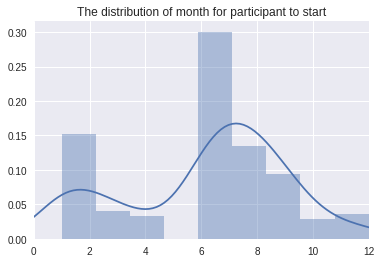

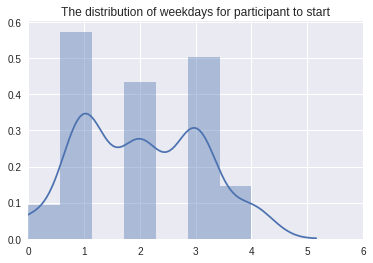

0=Mon 1=Tue 2=Wed 3=Thur 4=Fir 5=Sat 6=Sun


In [61]:
chart=sns.distplot(pd.DatetimeIndex(data['participation_start']).month)
chart.set_title('The distribution of month for participant to start')
plt.xlim(0, 12)
plt.show()

chart=sns.distplot(pd.DatetimeIndex(data['participation_start']).weekday)
chart.set_title('The distribution of weekdays for participant to start')
plt.xlim(0, 6)
plt.show()
print("0=Mon 1=Tue 2=Wed 3=Thur 4=Fir 5=Sat 6=Sun")

From the distribution of months, I found that there were two peak times of participants starting to use the app in a year. One was in February and another one is in July which is also the highest one. From the distribution of the weekdays, I found that the day with largest number of participants to start is Tuesday; the second largest number is Thursday and the third is Wednesday.


Next,I am going to explore the relationship between six features and the time they were released to participants

I convert the data to datetime object first

In [62]:
data['WEEK_VIEW'] = pd.to_datetime(data['WEEK_VIEW']) 
data['MINUTE_VIEW'] = pd.to_datetime(data['MINUTE_VIEW']) 
data['ENHANCED_VIEW'] = pd.to_datetime(data['ENHANCED_VIEW']) 
data['COMPARE_CHART'] = pd.to_datetime(data['COMPARE_CHART']) 
data['DUAL_CHART'] = pd.to_datetime(data['DUAL_CHART']) 
data['HEATING_INTERVENTION'] = pd.to_datetime(data['HEATING_INTERVENTION'])

Then I am ploting the relationship between six features and months they were released.

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


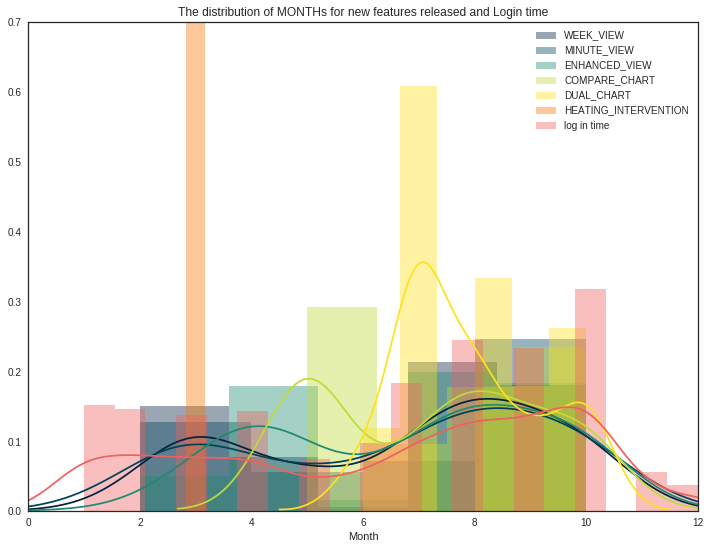

In [63]:
with sns.axes_style("white"):
    f, axes = plt.subplots(figsize=(12,9), sharex=True)
    data['monthWV']=pd.DatetimeIndex(data['WEEK_VIEW']).month
    chart=sns.distplot(data['monthWV'].dropna(), color='#092140', label='WEEK_VIEW')

    data['monthMV']=pd.DatetimeIndex(data['MINUTE_VIEW']).month
    chart=sns.distplot(data['monthMV'].dropna(), color='#004358', label='MINUTE_VIEW')

    data['monthEV']=pd.DatetimeIndex(data['ENHANCED_VIEW']).month
    chart=sns.distplot(data['monthEV'].dropna(), color='#1F8A70', label='ENHANCED_VIEW')

    data['monthCC']=pd.DatetimeIndex(data['COMPARE_CHART']).month
    chart=sns.distplot(data['monthCC'].dropna(), color='#BEDB39', label='COMPARE_CHART')

    data['monthDC']=pd.DatetimeIndex(data['DUAL_CHART']).month
    chart=sns.distplot(data['monthDC'].dropna(), color='#FFE11A', label='DUAL_CHART')

    data['monthHI']=pd.DatetimeIndex(data['HEATING_INTERVENTION']).month
    chart=sns.distplot(data['monthHI'].dropna(), color='#FD7400', label='HEATING_INTERVENTION')

    df['monthlogin']=pd.DatetimeIndex(df['time']).month
    chart=sns.distplot(df['monthlogin'].dropna(), color='#F06060', label='log in time')

    chart.set_title('The distribution of MONTHs for new features released and Login time')
    plt.xlim(0, 12)
    plt.ylim(0, .7)
    ax = plt.gca() 
    ax.set(xlabel='Month')
    plt.legend()
    plt.savefig('1.png')
    plt.show()

From the distplot, we can tell that most features has two peak time to release in a year except HEATING INTERVENTION. WEEK VIEW and MINUTE VIEW have very similar trend which peaked on March and August. Although ENHANCED VIEW and COMPARE CHART also reached their second peak in August,the first peak of ENHANCED VIEW is in April and the that of COMPARE CHART is in May. HEATING INTERVENTION is a very special one, it is only released in March.All features are released between February and October. There is no function released on January, November and December.

Next, I am ploting the relationship between six features and the days of week they were released.

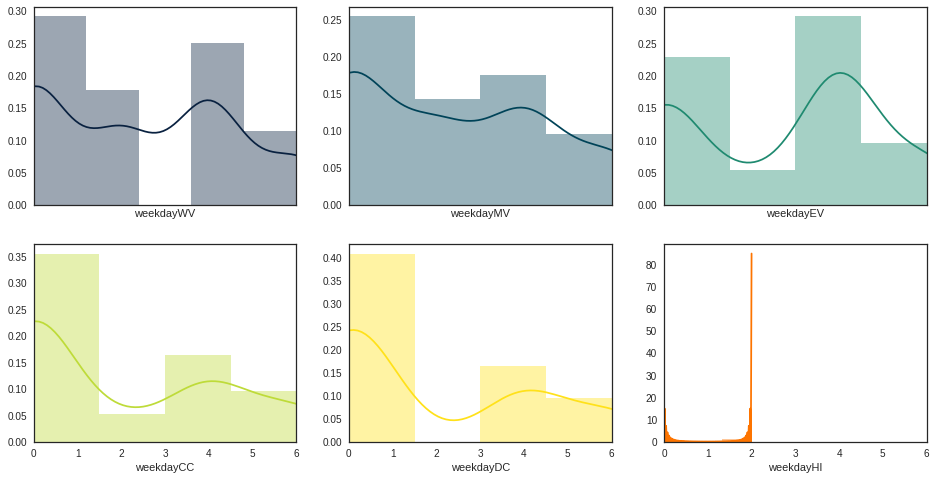

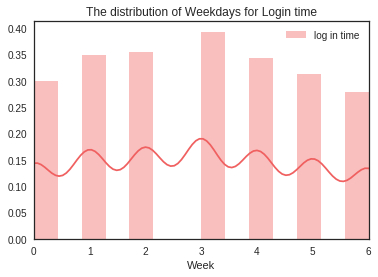

0=Mon 1=Tue 2=Wed 3=Thur 4=Fir 5=Sat 6=Sun


In [64]:
with sns.axes_style("white"):
    f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=True)
    data['weekdayWV']=pd.DatetimeIndex(data['WEEK_VIEW']).weekday
    chart=sns.distplot(data['weekdayWV'].dropna(), ax=axes[0,0], color='#092140', label='WEEK_VIEW')

    data['weekdayMV']=pd.DatetimeIndex(data['MINUTE_VIEW']).weekday
    chart=sns.distplot(data['weekdayMV'].dropna(), ax=axes[0,1], color='#004358', label='MINUTE_VIEW')

    data['weekdayEV']=pd.DatetimeIndex(data['ENHANCED_VIEW']).weekday
    chart=sns.distplot(data['weekdayEV'].dropna(), ax=axes[0,2], color='#1F8A70', label='ENHANCED_VIEW')

    data['weekdayCC']=pd.DatetimeIndex(data['COMPARE_CHART']).weekday
    chart=sns.distplot(data['weekdayCC'].dropna(), ax=axes[1,0], color='#BEDB39', label='COMPARE_CHART')

    data['weekdayDC']=pd.DatetimeIndex(data['DUAL_CHART']).weekday
    chart=sns.distplot(data['weekdayDC'].dropna(), ax=axes[1,1], color='#FFE11A', label='DUAL_CHART')

    data['weekdayHI']=pd.DatetimeIndex(data['HEATING_INTERVENTION']).weekday
    chart=sns.distplot(data['weekdayHI'].dropna(), ax=axes[1,2], color='#FD7400', label='HEATING_INTERVENTION')

    plt.xlim(0, 6)
    plt.savefig('2.png')
    plt.show()

with sns.axes_style("white"):
    df['weeklogin']=pd.DatetimeIndex(df['time']).weekday
    chart=sns.distplot(df['weeklogin'].dropna(), color='#F06060', label='log in time')
    chart.set_title('The distribution of Weekdays for Login time')
    plt.xlim(0, 6)
    ax = plt.gca() 
    ax.set(xlabel='Week')
    plt.legend()
    plt.savefig('3.png')
    plt.show()
print("0=Mon 1=Tue 2=Wed 3=Thur 4=Fir 5=Sat 6=Sun")

The plots show that every features except HEATING INTERVENTION has two peak time of releasing on Monday and Friday. WEEK VIEW, MINUTE VIEW, COMPARE CHART and DAUL CHART were released the most on Monday while ENHANCED VIEW released the most on Friday. The WEEK VIEW was ncver released on Thursday and DAUL CHART never released on Wednesday. HEATING INTERVENTION is still special. It was released the most on Wednesday and never relased from Thursday to Sunday.

After that, I am ploting the relationship between six features and the hours of day they were released.

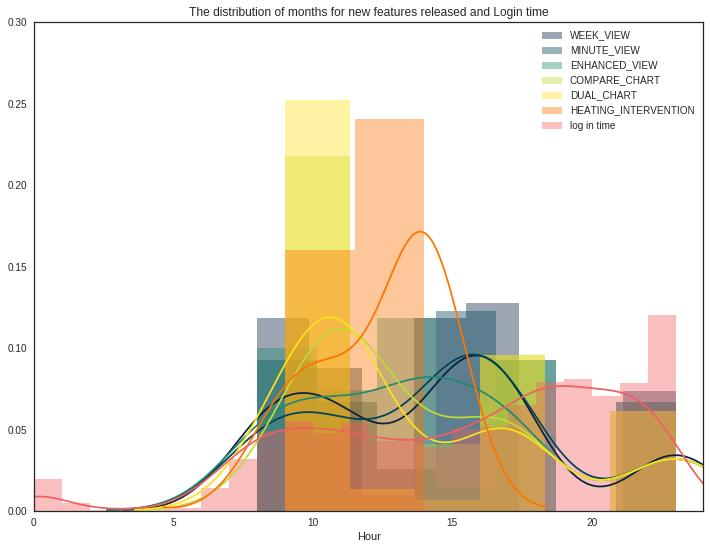

In [65]:
with sns.axes_style("white"):
    f, axes = plt.subplots(figsize=(12,9), sharex=True)
    data['hourWV']=pd.DatetimeIndex(data['WEEK_VIEW']).hour
    chart=sns.distplot(data['hourWV'].dropna(), color='#092140', label='WEEK_VIEW')

    data['hourMV']=pd.DatetimeIndex(data['MINUTE_VIEW']).hour
    chart=sns.distplot(data['hourMV'].dropna(), color='#004358', label='MINUTE_VIEW')

    data['hourEV']=pd.DatetimeIndex(data['ENHANCED_VIEW']).hour
    chart=sns.distplot(data['hourEV'].dropna(), color='#1F8A70', label='ENHANCED_VIEW')

    data['hourCC']=pd.DatetimeIndex(data['COMPARE_CHART']).hour
    chart=sns.distplot(data['hourCC'].dropna(), color='#BEDB39', label='COMPARE_CHART')

    data['hourDC']=pd.DatetimeIndex(data['DUAL_CHART']).hour
    chart=sns.distplot(data['hourDC'].dropna(), color='#FFE11A', label='DUAL_CHART')

    data['hourHI']=pd.DatetimeIndex(data['HEATING_INTERVENTION']).hour
    chart=sns.distplot(data['hourHI'].dropna(), color='#FD7400', label='HEATING_INTERVENTION')
    chart.set_title('The distribution of months for new features released and Login time')

    df['hourlogin']=pd.DatetimeIndex(df['time']).hour
    chart=sns.distplot(df['hourlogin'].dropna(), color='#F06060', label='log in time')

    chart.set_title('The distribution of months for new features released and Login time')
    plt.xlim(0, 24)
    plt.ylim(0, .3)
    ax = plt.gca()
    ax.set(xlabel='Hour')
    plt.legend()
    plt.savefig('4.png')
    plt.show()

The plot demonstrates that all features were released between 8:00 to 23:00. Every function except HEATING INTERVENTION has three release peak time a day. The first peak is around 9:00 to 11:00, the second is between 15:00 to 17:00,the third on is between 21:00 - 23:00.The HEATING INTERVENTION is still very special. It was released most between 13:00 to 15:00.All function was never released early than 8:00, between 19:00 - 21:00 and after 23:00.

Then, I am ploting the relationship between primary participants, their grnder and their age group.

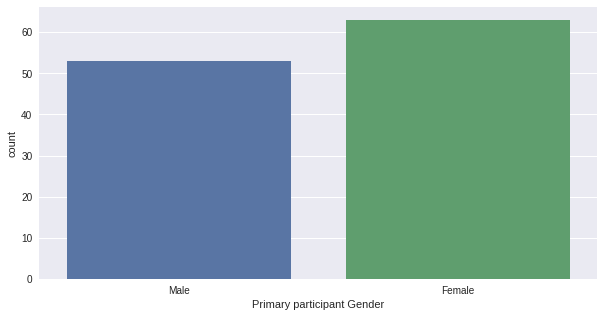

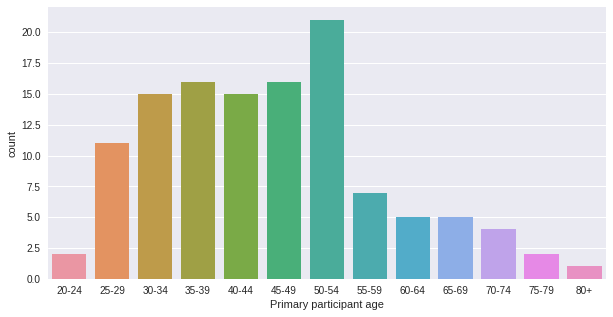

In [66]:
pdata = data[data['primaryparticipant'] != 0]

plt.figure(figsize=(10.0, 5.0))
sns.countplot(x="gender", data=pdata)
ax = plt.gca()
ax.set(xlabel='Primary participant Gender')
plt.show()

plt.figure(figsize=(10.0, 5.0))
sns.countplot(x="age", data=pdata.sort_values(by='age'))
ax = plt.gca()
ax.set(xlabel='Primary participant age')
plt.show()

The first plot shows that there are more female than male in primary participant. It is normal because in the statistics in first part, we have already known that there are more female than female in participant. The second plot shows that the largest age group in primary participant is 50-54 and the second largest is 35-39; the smallest age group is 80+ and the second smallest is 20-24.

Finally,I am ploting the relationship between person IDs and login times.

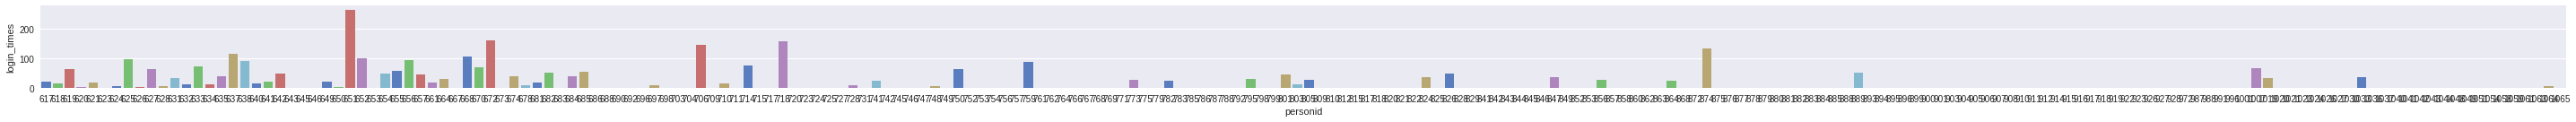

In [67]:
g = sns.factorplot(x="personid", y="login_times", data=df,
                   size=2, aspect=20, kind="bar", palette="muted")
plt.show()

The plot demostrates that different IDs logged in for different times. Some IDs just log in once but some log in for many times.

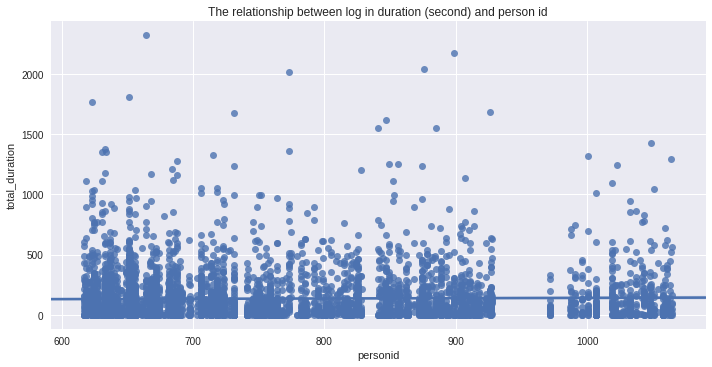

In [68]:
sns.lmplot( x="personid", y="total_duration", data=df,aspect=2)
plt.title('The relationship between log in duration (second) and person id')
plt.savefig('5.png')
plt.show()

# Reflect and Hypothesise

The first hypothesise is the functions are released to the participant at these times because the participant are more willing to look at the energy use after using heater for winter or using fan for summer which usually consume more energy. In last section, from the plot of relationship between six features and the month they use, it reflected that there are two peak time participant received the features. What is interesting is that one of the two peak time is just after winter and another one is just after summer. This hypothesise could be test by asking the data owner.

The second hypothesise is that the function HEATER INTERVENTION only released to participant who asked for it or had some special need. The plots in last section showed that no matter in distribution of months, weekdays or hours, the trends of HEATER INTERVENTION are all very different from other functions. This hypothesise could be tested by asking the data owner and checking each data with HEATER INTERVENTION function.

The third hypothesise is that the developer of the app did not choose primary participants with some restricted condition; maybe they make decision themselves to become the primary participants or not. The plot of gender and age group of primary participant showed that there is no very special feature and is very similar to the distribution of gender and age group in all participants. This hypothesise could be tested by asking the data owner who is also the developer of the app.

The fourth hypothesise is that the participants’ login durations decreased with the increasing of login times. The plot of relationship between person ID and login times showed some IDs logged in for many times. The relationship between the login times of these IDs and their durations is worth to explore. These hypothesise could be tested by some advanced algorithms. I am currently face difficulties to find an algorithm for time duration.
